<a href="https://colab.research.google.com/github/brunoras/criminalidade_conquista/blob/main/An%C3%A1lise_de_Criminalidade_em_Vit%C3%B3ria_da_Conquita_de_2014_a_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análise de Roubos e Furtos de Carros em Vitória da Conquita de 2014 a 2021**

# Bibliotecas

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Leitura dos dados

In [ ]:
# Caminho para leitura dos arquivos
path = '/content/drive/MyDrive/Criminalidade Conquista 2021/Dados Coletados/'

In [ ]:
dicio = pd.read_excel(path + 'Dicionário.xlsx')
dicio

,2014 - 2018,casos,2019 - 2021: Pessoas,pessoas,2019 - 2021: Ocorrências,ocorrencias
0,Homicídio doloso,hodo,Feminicidio,femi,Furto de veículo,fvei
1,Lesão corporal seguida de morte,lcsm,Homicídio doloso,hodo,Roubo a estabelecimento comercial/serviços,recs
2,Roubo com resultado morte (latrocínio),latr,Homicídio doloso com indício de excludente de ...,hdei,Roubo a ônibus (urbano e em rodovia),roni
3,Tentativa de homicídio,thom,Homicídio doloso no trânsito,hdtr,Roubo a residência,rore
4,Estupro,estu,Homicídio ocorrido em presídio,hopr,Roubo a transeunte,rtra
5,Roubo a ônibus (urbano e em rodovia),roni,Lesão corporal seguida de morte,lcsm,Roubo de carga,rcar
6,Roubo de veículo,rvei,Roubo com resultado morte (latrocínio),latr,Uso/porte substância entorpecente (usuários),uspo
7,Furto de veículo,fvei,Tentativa de homicídio,thom,Roubo de veículo,rvei
8,Uso/porte substância entorpecente (usuários),uspo,Estupro,estu,NaN,NaN


In [ ]:
zipado = zip(dicio['casos'].to_list(), dicio['2014 - 2018'].to_list())
crimes = dict(zipado)
crimes

{'estu': 'Estupro',
 'fvei': 'Furto de veículo',
 'hodo': 'Homicídio doloso',
 'latr': 'Roubo com resultado morte (latrocínio)',
 'lcsm': 'Lesão corporal seguida de morte',
 'roni': 'Roubo a ônibus (urbano e em rodovia)',
 'rvei': 'Roubo de veículo',
 'thom': 'Tentativa de homicídio',
 'uspo': 'Uso/porte substância entorpecente (usuários)'}

In [ ]:
dados = pd.read_csv(path + '14_21.csv')
dados

,ano,mes,hodo,lcsm,latr,thom,estu,roni,rvei,fvei,uspo
0,2014,jan,13,0,0,5,26,1,80,15,35
1,2014,fev,11,1,0,7,6,1,70,14,21
2,2014,mar,10,1,0,4,11,1,105,23,15
3,2014,abr,21,1,1,11,11,1,103,12,33
4,2014,mai,15,0,2,8,11,2,74,12,26
...,...,...,...,...,...,...,...,...,...,...,...
85,2021,fev,4,0,0,5,8,0,12,15,0
86,2021,mar,6,0,1,1,9,0,11,25,1
87,2021,abr,6,1,2,6,2,0,9,18,0
88,2021,mai,8,0,0,6,11,0,13,32,0


# Análise Descritiva e Gráfica

In [ ]:
def plotar(dataset, x, y, labelx, labely, titulo, hue=None):
  sns.set_style('darkgrid')
  graf = sns.lineplot(x=x, y=y, data=dataset, hue=hue)
  graf.figure.set_size_inches(12,8)
  graf.set_title(titulo, loc='left', fontsize=18)
  graf.set_xlabel(labelx, fontsize=14)
  graf.set_ylabel(labely, fontsize=14)
  plt.show()

In [ ]:
def box(data, x, y):
  sns.set_style('darkgrid')
  plt.figure(figsize = (12,8))
  ax = sns.boxplot(data=data, x=x, y=y ,orient='v', width=0.3)
  ax.set_title(crimes[y], loc='left', fontsize=18)
  fig = ax.get_figure()
  plt.show()

In [ ]:
def histograma(dataset, labelx, labely, titulo, bins):
  sns.set_style('darkgrid')
  graf = sns.histplot(data=dataset, bins=bins, kde=True)
  graf.figure.set_size_inches(12,8)
  graf.set_title(titulo, loc='left', fontsize=18)
  graf.set_xlabel(labelx, fontsize=14)
  graf.set_ylabel(labely, fontsize=14)
  plt.show()

## Gráficos

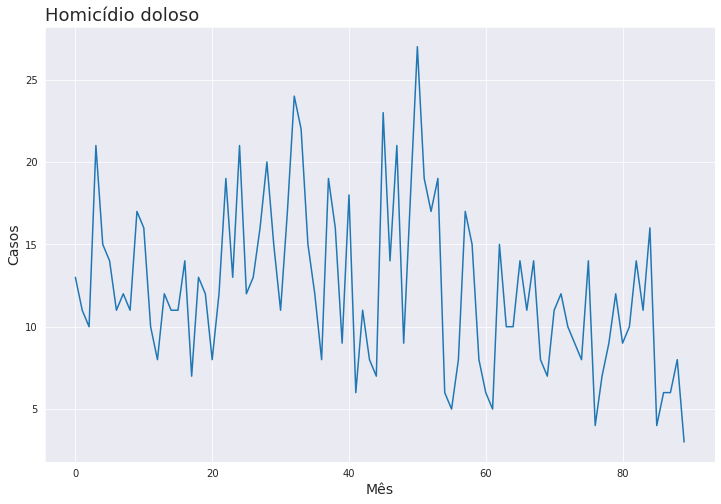

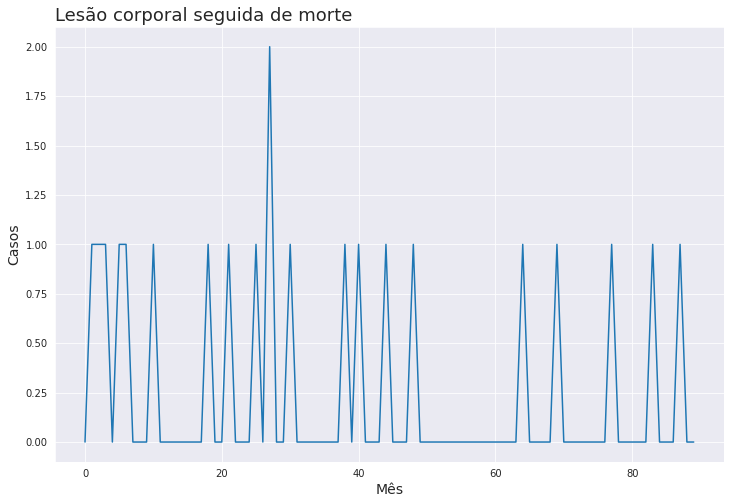

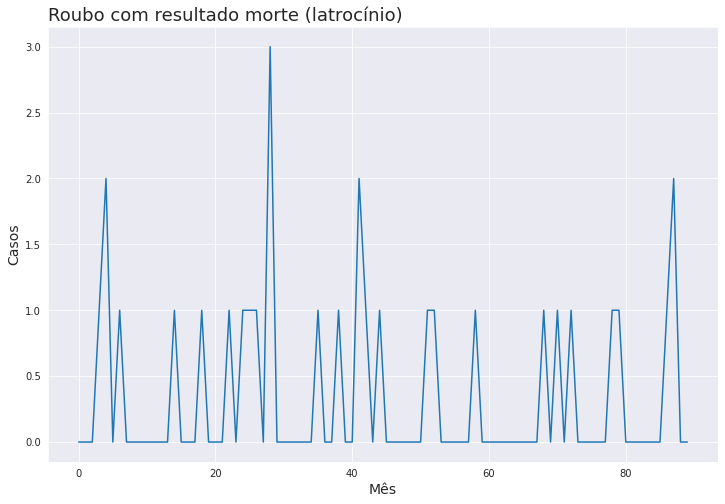

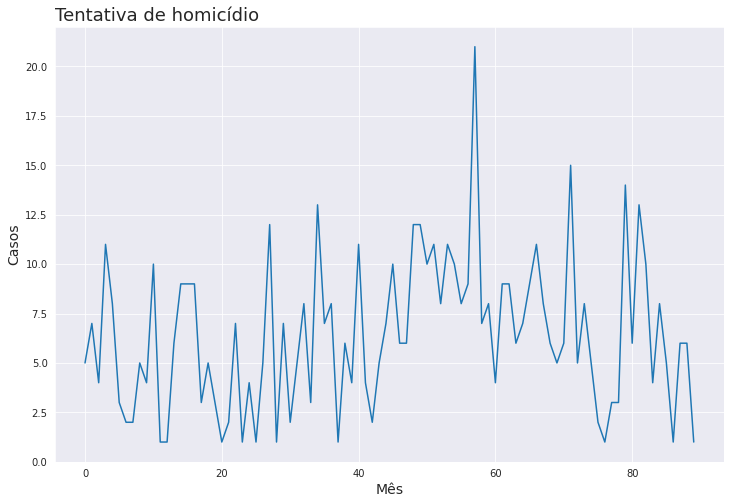

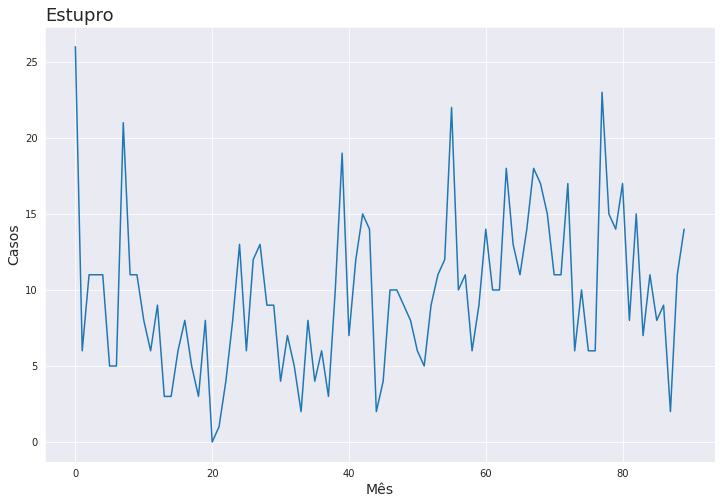

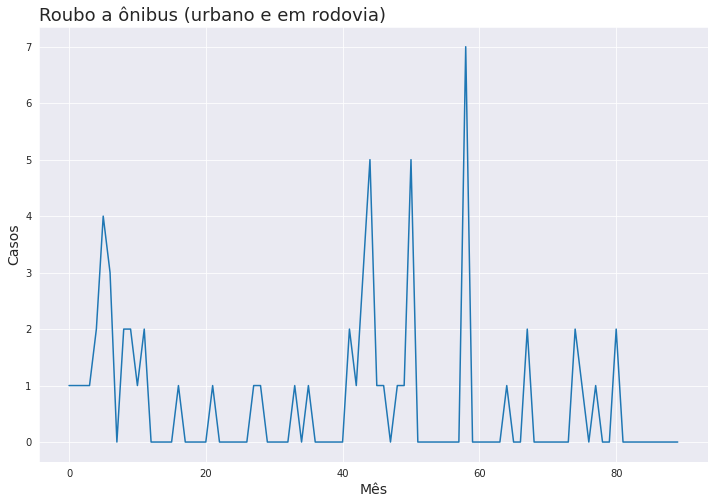

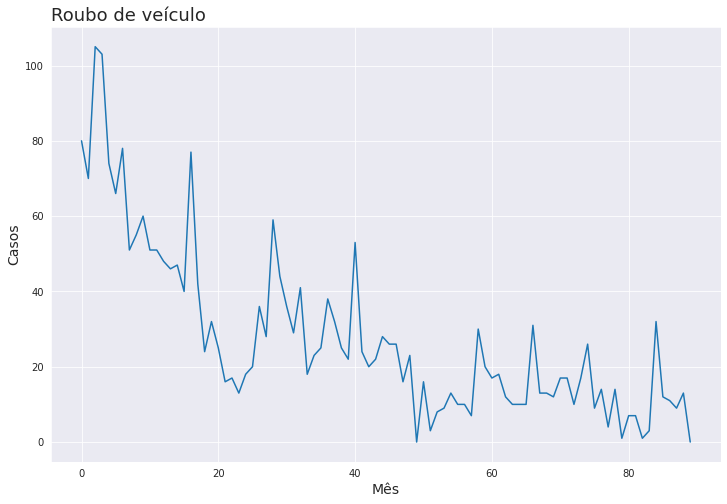

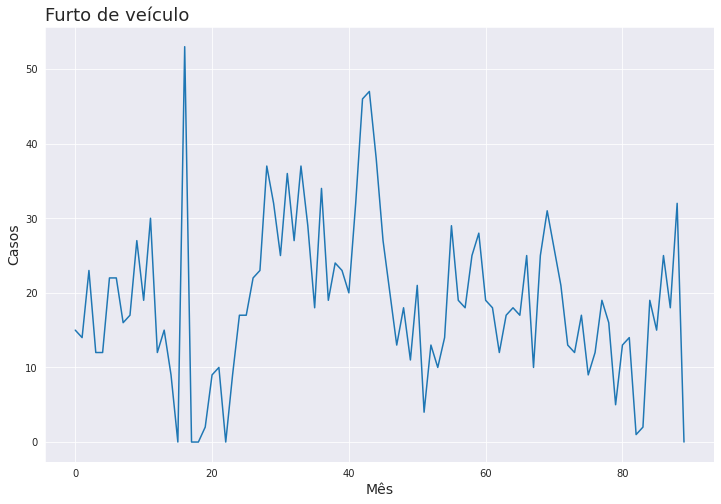

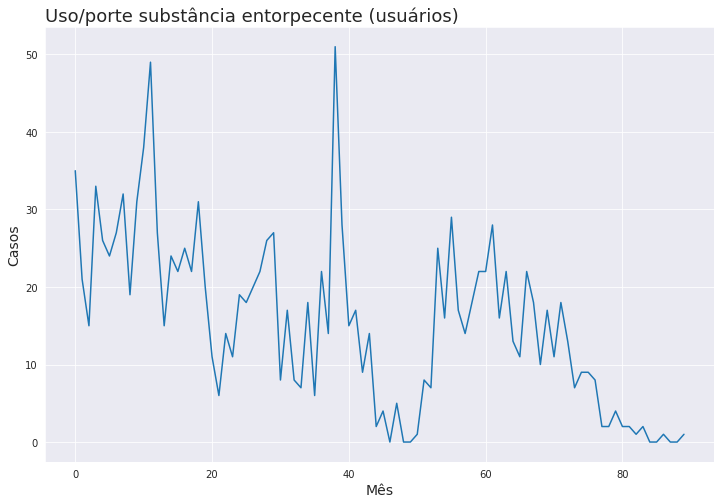

In [ ]:
for crime in list(crimes):
  plotar(dados, dados.index, crime,
         'Mês', 'Casos', crimes[crime])

Roubo com resultado morte (latrocínio), Lesão corporal seguida de morte e Roubo a ônibus (urbano e em rodovia) tem poucos casos para fazer análises, portanto, vamos removê-los.

In [ ]:
del crimes['latr']
del crimes['lcsm']
del crimes['roni']
crimes

{'estu': 'Estupro',
 'fvei': 'Furto de veículo',
 'hodo': 'Homicídio doloso',
 'rvei': 'Roubo de veículo',
 'thom': 'Tentativa de homicídio',
 'uspo': 'Uso/porte substância entorpecente (usuários)'}

In [ ]:
dados = dados[['ano', 'mes']+list(crimes)]
dados

,ano,mes,hodo,thom,estu,rvei,fvei,uspo
0,2014,jan,13,5,26,80,15,35
1,2014,fev,11,7,6,70,14,21
2,2014,mar,10,4,11,105,23,15
3,2014,abr,21,11,11,103,12,33
4,2014,mai,15,8,11,74,12,26
...,...,...,...,...,...,...,...,...
85,2021,fev,4,5,8,12,15,0
86,2021,mar,6,1,9,11,25,1
87,2021,abr,6,6,2,9,18,0
88,2021,mai,8,6,11,13,32,0


## Teste de Tendência

**Teste Augmented Dickey-Fuller**

Testa se uma série temporal tem uma raiz unitária, por exemplo,  tem uma tendência ou, mais geralmente, é autorregressiva.

In [ ]:
from statsmodels.tsa.stattools import adfuller
for crime in list(crimes):
  adf = adfuller(dados[crime].values, autolag='AIC')
  output = pd.Series(adf[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
  print(crimes[crime])
  print('*'*45)

  for key,value in adf[4].items():
    output['critical value (%s)'%key]= value
  print(output)
  for i in [1, 5, 10]:
    if output['critical value ('+str(i)+'%)'] < output['Test Statistic']:
      print('Provavelmente não é estacionária para '+str(i)+'%.')
    else:
      print('Provavelmete é estacionária para '+str(i)+'%.')
  print('*'*45)
  print(' ')

Homicídio doloso
*********************************************
Test Statistic                -6.581944e+00
p-value                        7.476228e-09
#lags used                     0.000000e+00
number of observations used    8.900000e+01
critical value (1%)           -3.506057e+00
critical value (5%)           -2.894607e+00
critical value (10%)          -2.584410e+00
dtype: float64
Provavelmete é estacionária para 1%.
Provavelmete é estacionária para 5%.
Provavelmete é estacionária para 10%.
*********************************************
 
Tentativa de homicídio
*********************************************
Test Statistic                 -4.835511
p-value                         0.000046
#lags used                      1.000000
number of observations used    88.000000
critical value (1%)            -3.506944
critical value (5%)            -2.894990
critical value (10%)           -2.584615
dtype: float64
Provavelmete é estacionária para 1%.
Provavelmete é estacionária para 5%.
Provavelm

## Histogramas

In [ ]:
dados[list(crimes)][:75].describe()

,hodo,thom,estu,rvei,fvei,uspo
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,13.026667,6.613333,9.426667,31.493333,20.026667,17.986667
std,4.887860,3.766471,5.067579,22.752115,10.736366,10.342112
min,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,9.500000,4.000000,6.000000,16.000000,13.000000,11.000000
50%,12.000000,6.000000,9.000000,25.000000,19.000000,18.000000
75%,16.000000,9.000000,11.500000,43.000000,25.500000,24.000000
max,27.000000,21.000000,26.000000,105.000000,53.000000,51.000000


In [ ]:
dados.groupby('ano').describe()

hodo                                    ...  uspo                          
     count       mean       std   min    25%  ...   min    25%   50%    75%   max
ano                                           ...                                
2014  12.0  13.416667  3.342790  10.0  11.00  ...  15.0  23.25  29.0  33.50  49.0
2015  12.0  11.666667  3.200379   7.0  10.25  ...   6.0  13.25  21.0  24.25  31.0
2016  12.0  16.500000  4.337993  11.0  12.75  ...   6.0   8.00  18.0  20.50  27.0
2017  12.0  13.333333  5.944185   6.0   8.00  ...   0.0   4.75  14.0  18.25  51.0
2018  12.0  14.000000  6.714976   5.0   8.00  ...   0.0   5.50  15.0  19.00  29.0
2019  12.0  10.250000  3.250874   5.0   7.75  ...  10.0  12.50  17.5  22.00  28.0
2020  12.0   9.750000  2.832442   4.0   8.75  ...   1.0   2.00   3.0   8.25  13.0
2021   6.0   7.166667  4.665476   3.0   4.50  ...   0.0   0.00   0.0   0.75   1.0

[8 rows x 48 columns]

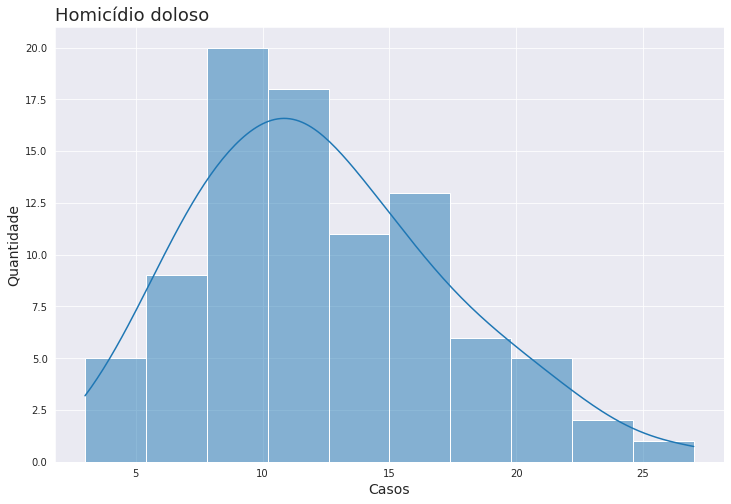

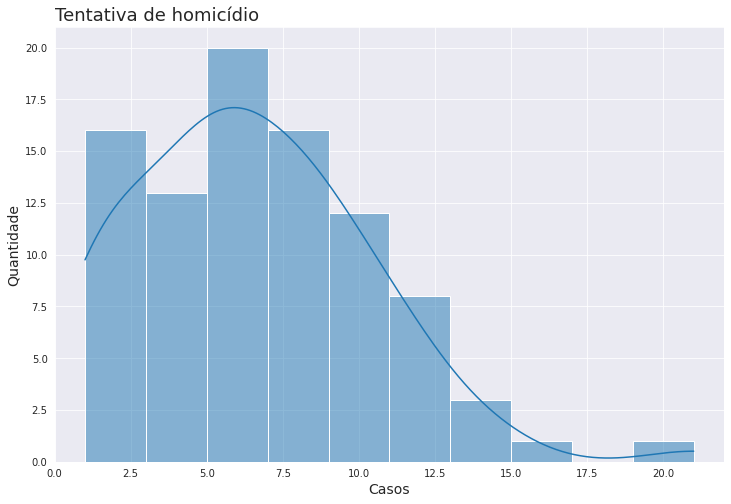

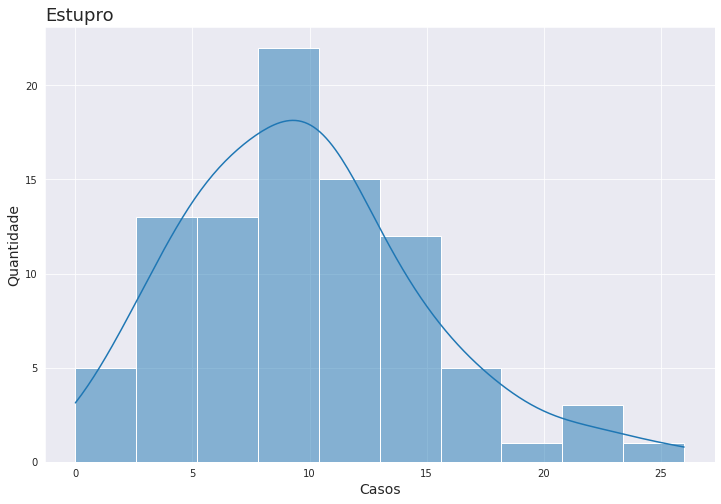

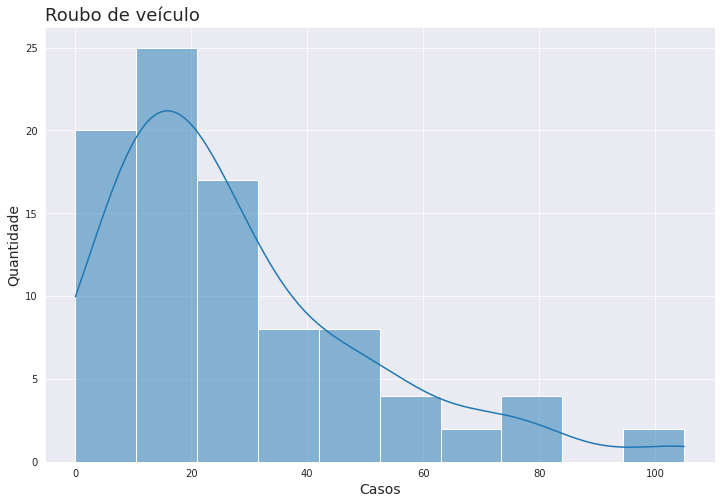

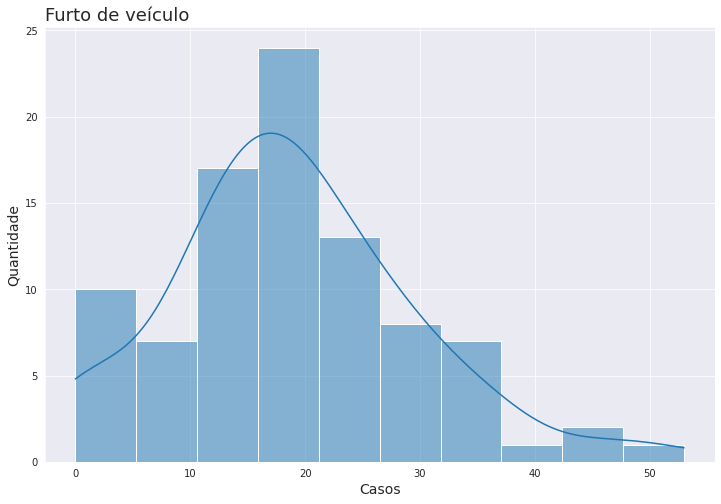

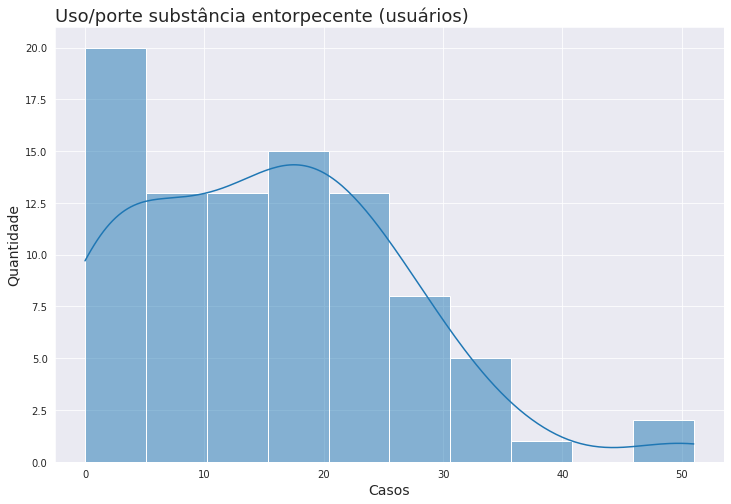

In [ ]:
for crime in list(crimes):
  histograma(dados[crime], 
             'Casos', 'Quantidade', 
              crimes[crime], 10)

**Média Móvel**

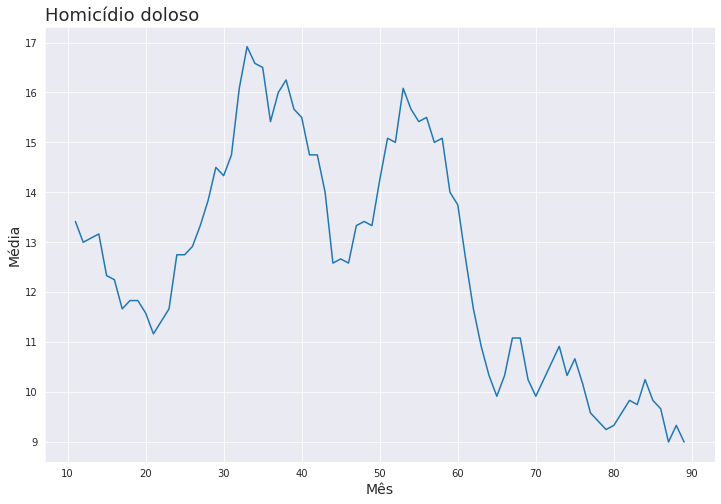

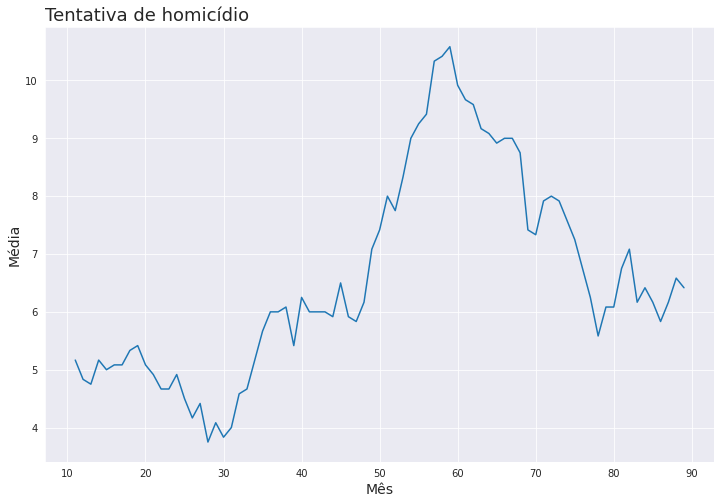

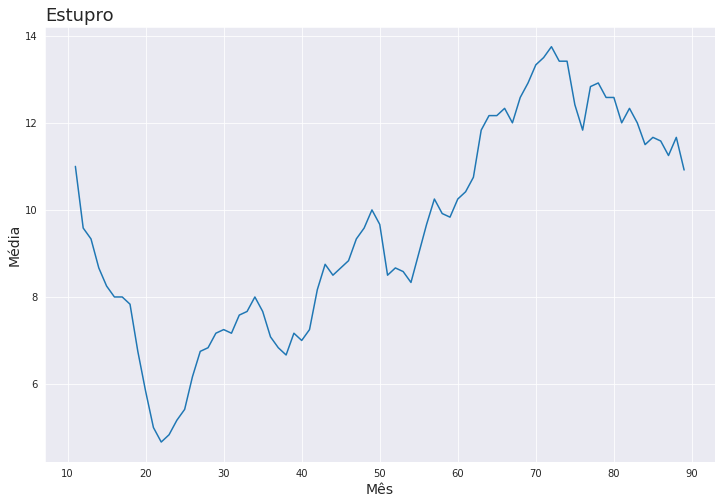

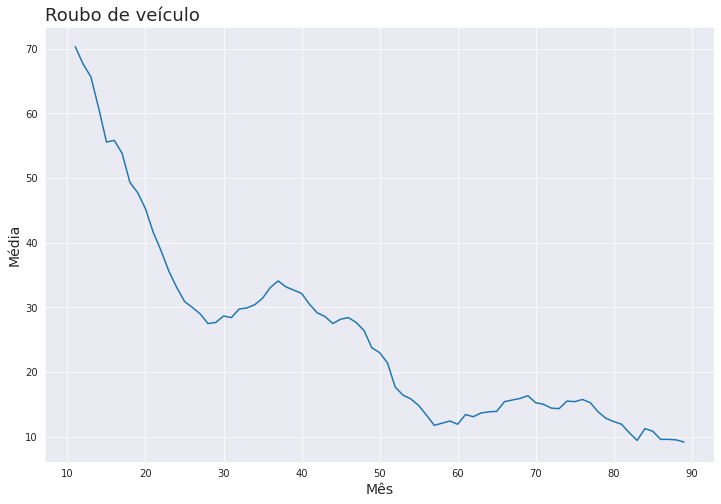

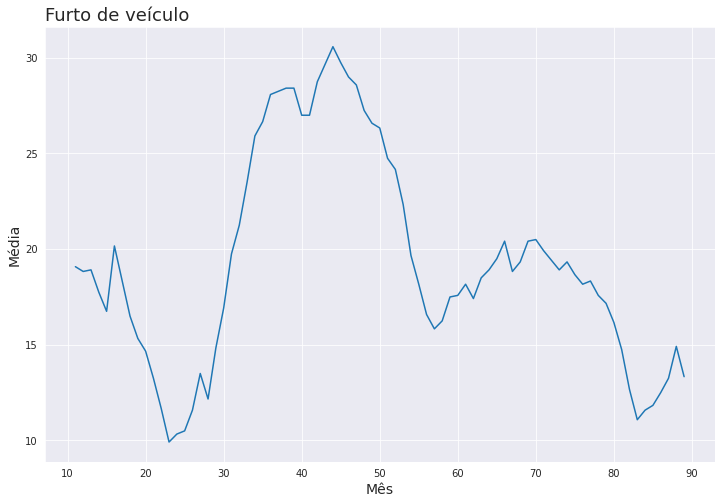

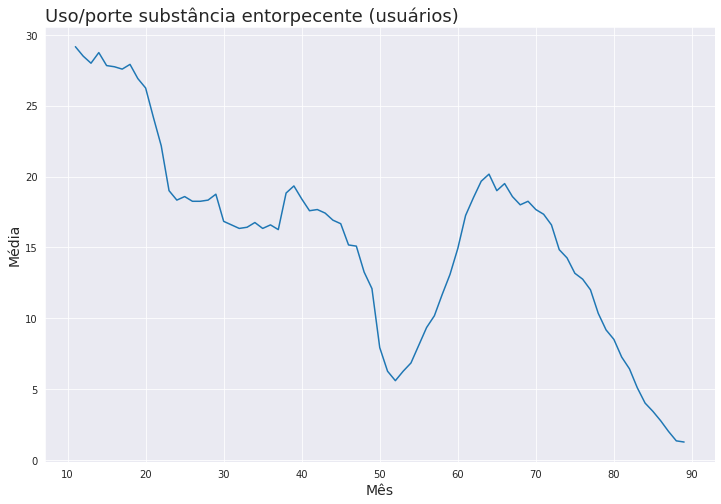

In [ ]:
mm = pd.DataFrame()
for crime in list(crimes):
  mm[crime+'_mean'] = dados[crime].rolling(12).mean()
  plotar(mm, mm.index, mm[crime+'_mean'].values, 'Mês', 'Média', crimes[crime])

**Desvio Padrão Móvel**

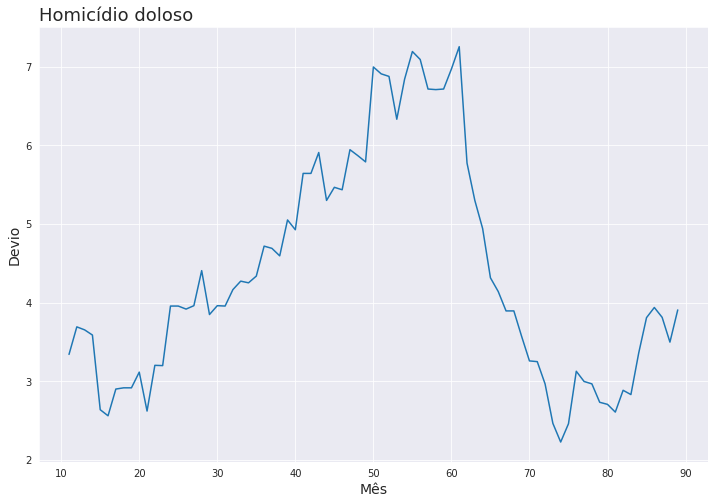

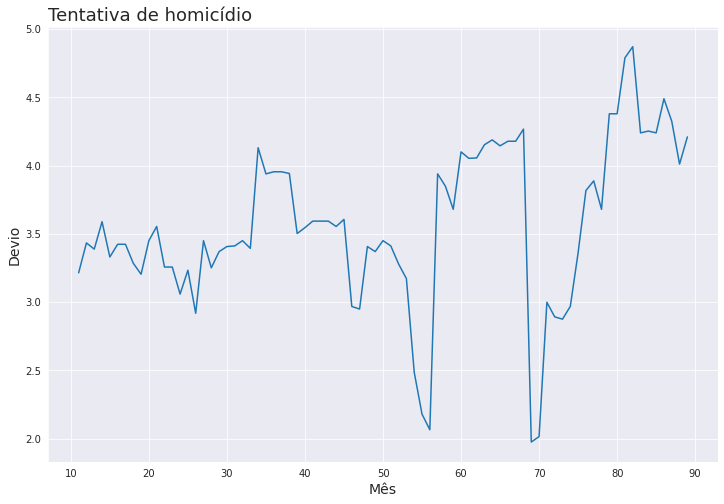

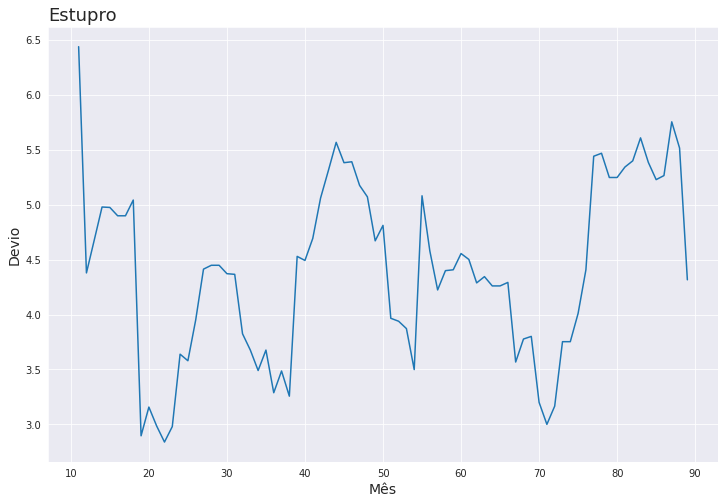

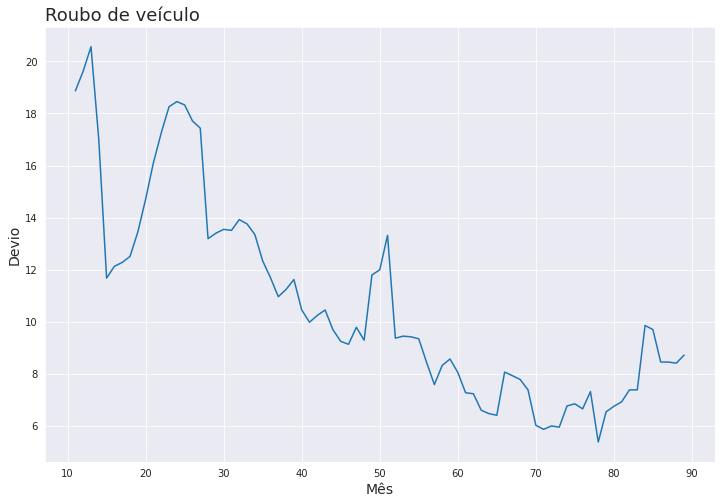

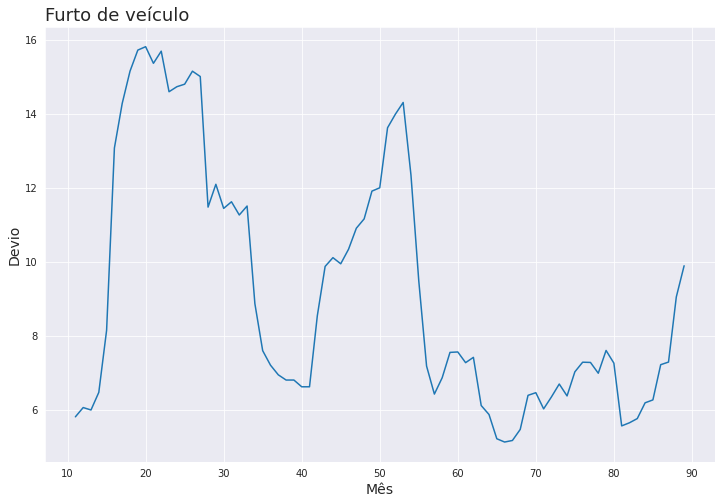

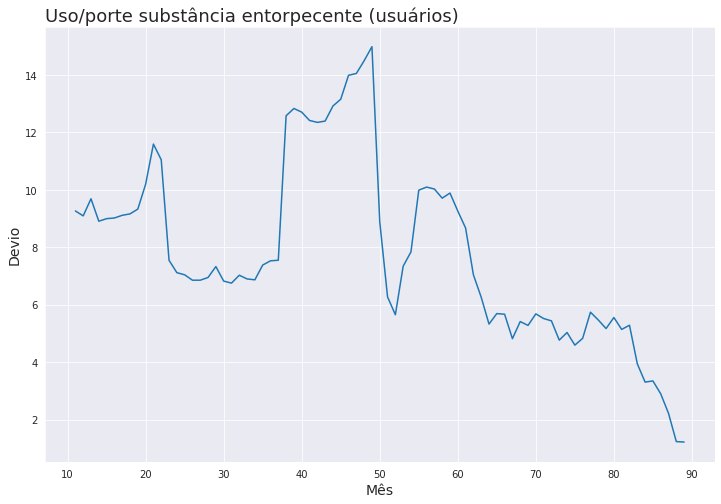

In [ ]:
for crime in list(crimes):
  mm[crime+'_std'] = dados[crime].rolling(12).std()
  plotar(mm, mm.index, mm[crime+'_std'].values, 'Mês', 'Devio', crimes[crime])

**Variação do Desvio com Tamanho 12**

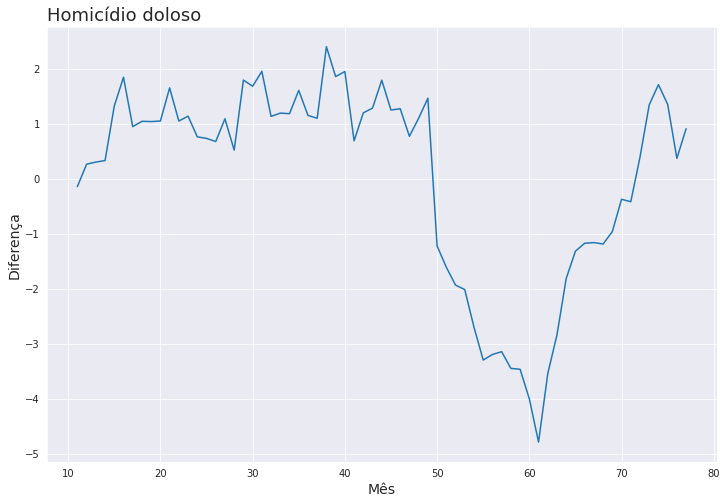

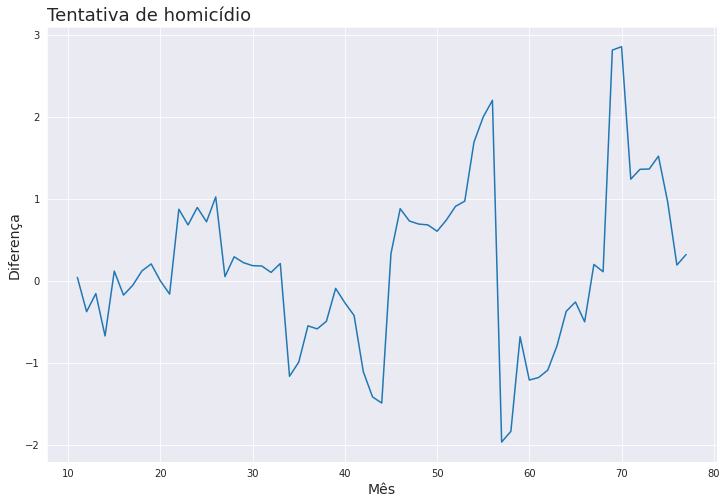

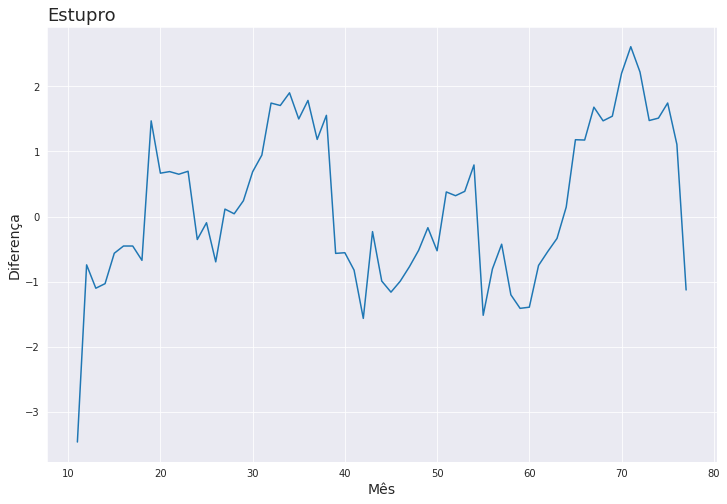

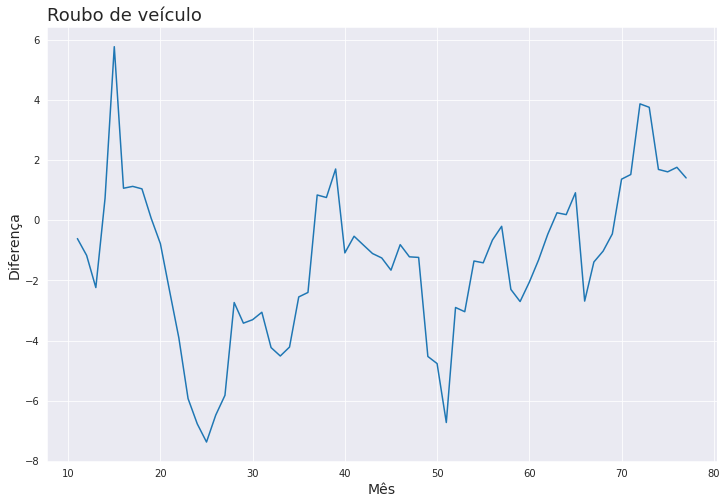

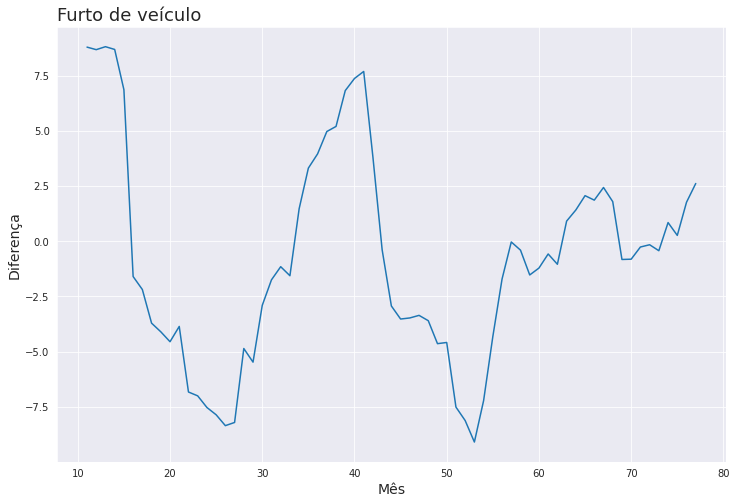

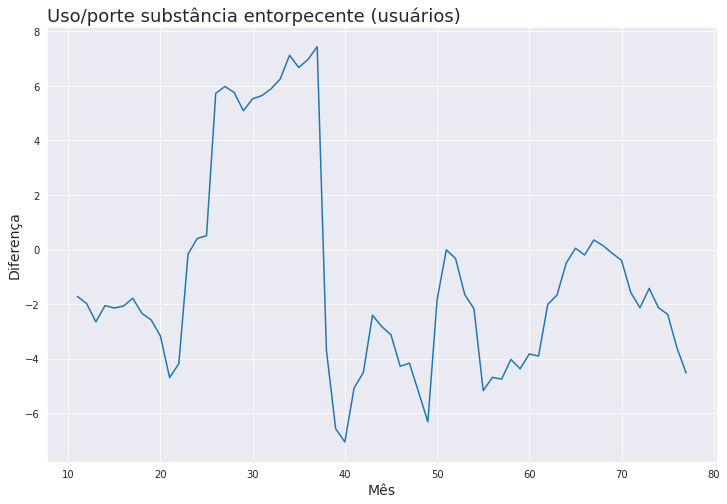

In [ ]:
diff = pd.DataFrame()
for crime in list(crimes):
  diff[crime+'_diff'] = [mm[crime+'_std'][12+i] - mm[crime+'_std'][i] for i in range(len(mm)-12)]
  plotar(diff, diff.index, diff[crime+'_diff'].values, 'Mês', 'Diferença', crimes[crime])

**Close nos 16 últimos pontos das diferenças dos desvios**

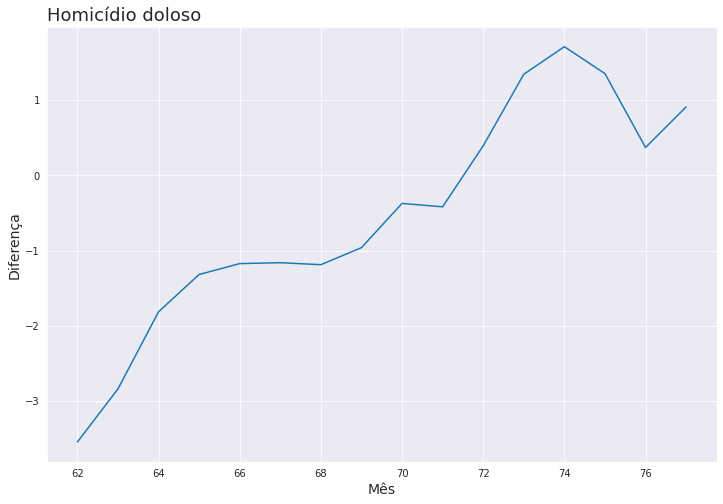

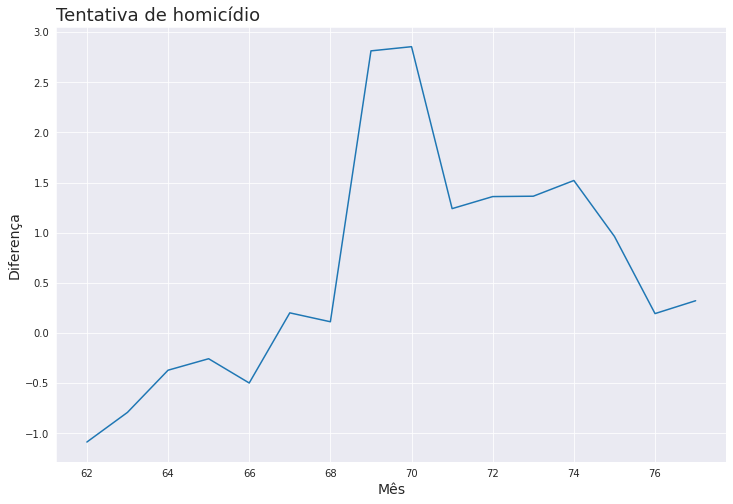

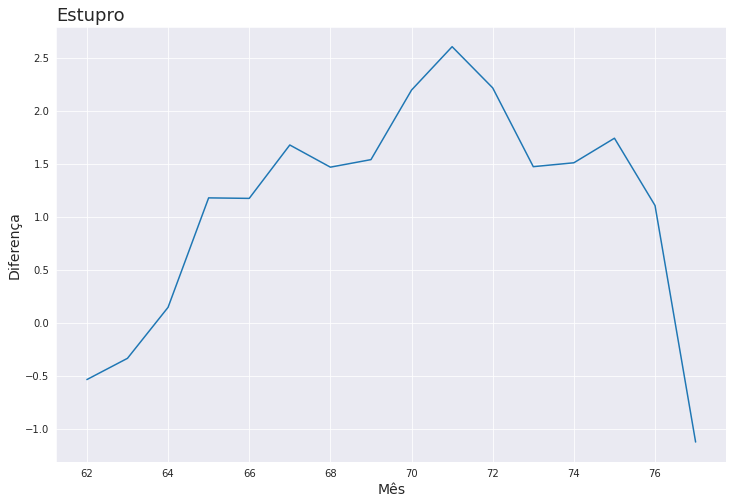

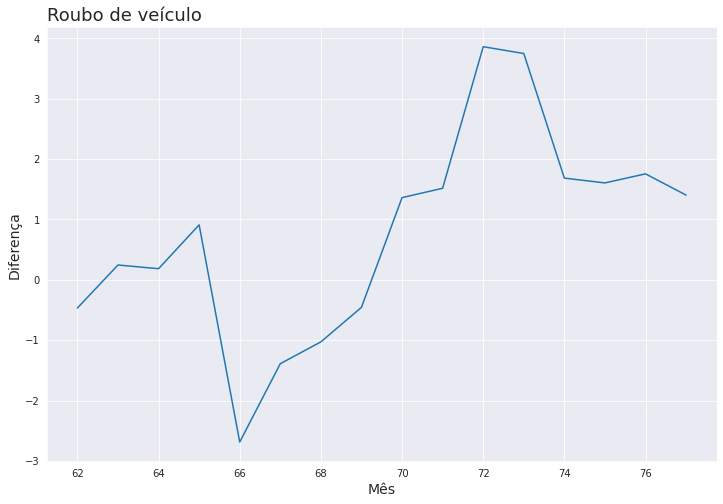

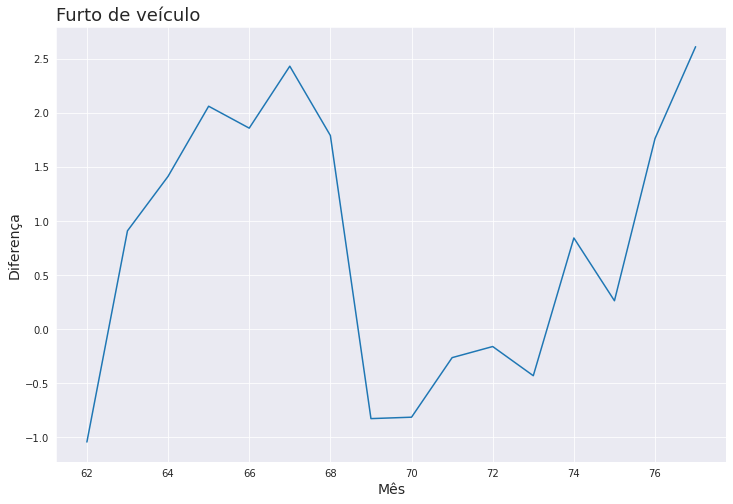

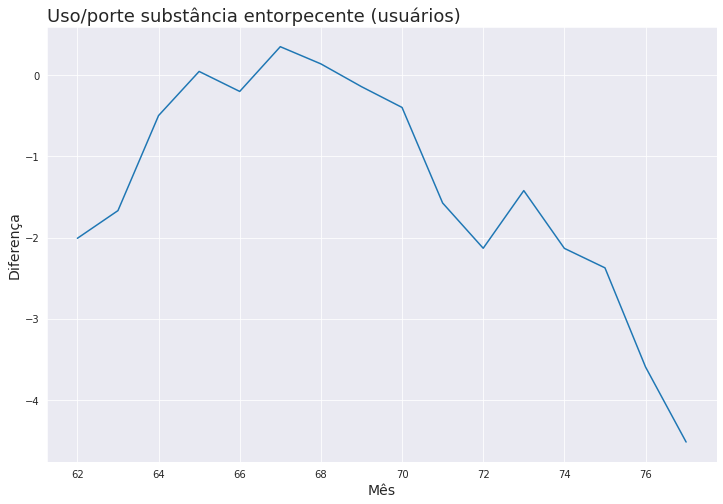

In [ ]:
diff = pd.DataFrame()
for crime in list(crimes):
  diff[crime+'_diff'] = [mm[crime+'_std'][12+i] - mm[crime+'_std'][i] for i in range(len(mm)-12)]
  plotar(diff[-16:], diff.index[-16:], diff[crime+'_diff'][-16:].values, 'Mês', 'Diferença', crimes[crime])

Considerando que para termos um ponto de mudança precisamos de pelo menos uma variação de ±5 no desvio padrão móvel, as séries temporais apresentadas aqui não tem variação suficiente para rejeitamos a hipótese de que não há pontos de mudança. Portanto a COVID-19 não afetou a criminalidade em Vitória da Conquista.

Quanto aos casos de uso/porte substância entorpecente, como temos uma tendência de queda, a variação do desvio padrão tende a cair também, logo também não há mudança durante a pandemia.